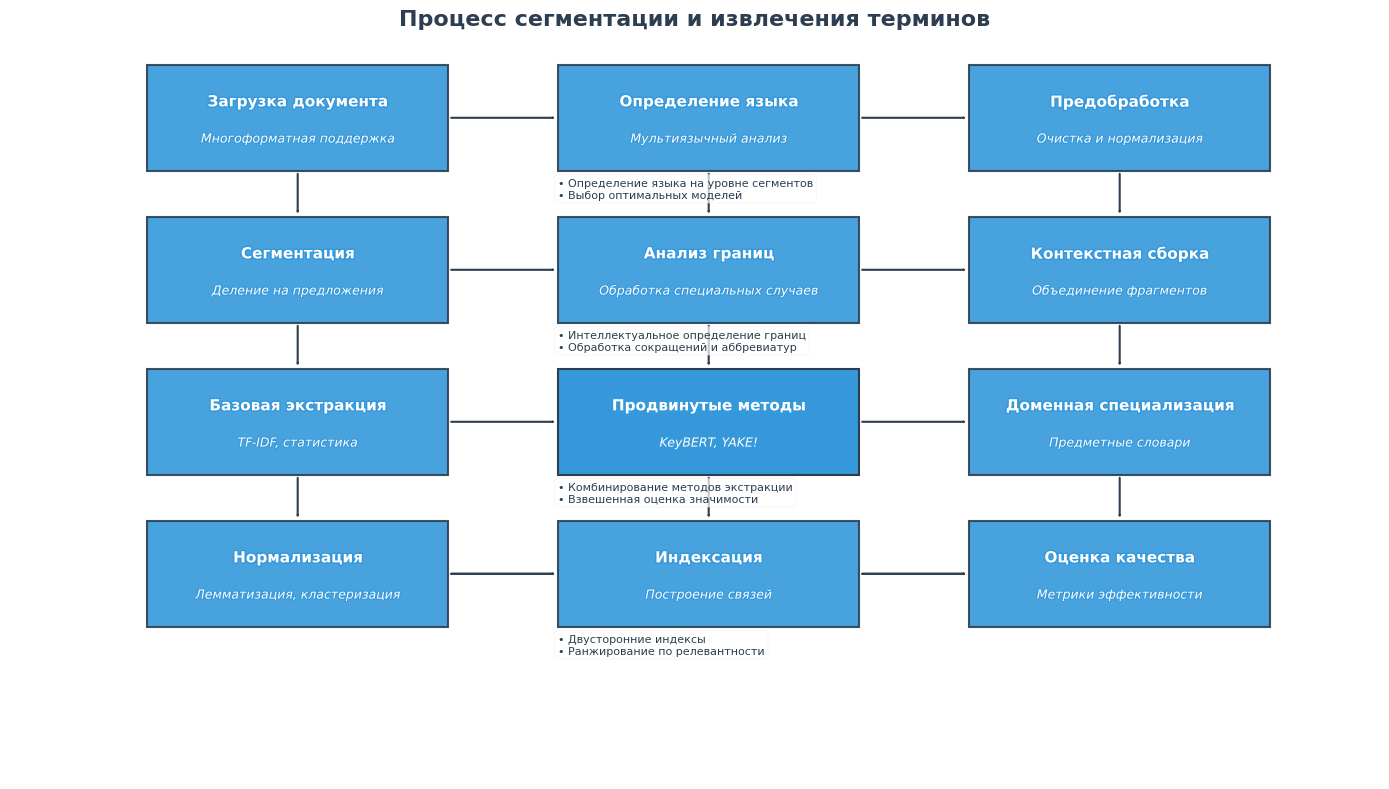

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch
import matplotlib.patheffects as path_effects

# Настройка стиля
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Определение цветов
colors = {
    'box': '#3498db',
    'arrow': '#2c3e50',
    'highlight': '#e74c3c',
    'background': '#f9f9f9',
    'text': '#2c3e50'
}

# Создание функций для рисования
def draw_box(x, y, title, subtitle=None, width=2.2, height=1.4, alpha=0.9):
    rect = plt.Rectangle((x, y), width, height, facecolor=colors['box'], alpha=alpha,
                         edgecolor=colors['arrow'], linewidth=1.5, zorder=1)
    ax.add_patch(rect)
    
    # Добавление текста с эффектом обводки для лучшей читаемости
    text = ax.text(x + width/2, y + height*0.65, title, 
                  ha='center', va='center', fontsize=11, fontweight='bold', 
                  color='white', zorder=2)
    text.set_path_effects([path_effects.withStroke(linewidth=2, foreground=colors['box'])])
    
    if subtitle:
        sub = ax.text(x + width/2, y + height*0.3, subtitle, 
                     ha='center', va='center', fontsize=9, 
                     color='white', zorder=2, style='italic')
        sub.set_path_effects([path_effects.withStroke(linewidth=1.5, foreground=colors['box'])])

def draw_arrow(start, end, style='arc3,rad=0.0'):
    arrow = FancyArrowPatch(start, end, connectionstyle=style,
                            arrowstyle='-|>', linewidth=1.5,
                            color=colors['arrow'], zorder=0)
    ax.add_patch(arrow)

# Размещение блоков процесса
# Этап 1: Подготовка и анализ документа
draw_box(1, 8, "Загрузка документа", "Многоформатная поддержка")
draw_box(4, 8, "Определение языка", "Мультиязычный анализ")
draw_box(7, 8, "Предобработка", "Очистка и нормализация")

# Этап 2: Сегментация
draw_box(1, 6, "Сегментация", "Деление на предложения")
draw_box(4, 6, "Анализ границ", "Обработка специальных случаев")
draw_box(7, 6, "Контекстная сборка", "Объединение фрагментов")

# Этап 3: Извлечение терминов
draw_box(1, 4, "Базовая экстракция", "TF-IDF, статистика")
draw_box(4, 4, "Продвинутые методы", "KeyBERT, YAKE!", alpha=1.0)
draw_box(7, 4, "Доменная специализация", "Предметные словари")

# Этап 4: Постобработка и индексация
draw_box(1, 2, "Нормализация", "Лемматизация, кластеризация")
draw_box(4, 2, "Индексация", "Построение связей")
draw_box(7, 2, "Оценка качества", "Метрики эффективности")

# Соединение блоков стрелками
# Горизонтальные стрелки
for y in [8, 6, 4, 2]:
    draw_arrow((3.2, y + 0.7), (4, y + 0.7))
    draw_arrow((6.2, y + 0.7), (7, y + 0.7))

# Вертикальные стрелки
for x in [1 + 1.1, 4 + 1.1, 7 + 1.1]:
    draw_arrow((x, 8), (x, 7.4))
    draw_arrow((x, 6), (x, 5.4))
    draw_arrow((x, 4), (x, 3.4))

# Финальные соединения
draw_arrow((3.2, 2 + 0.7), (4, 2 + 0.7))
draw_arrow((6.2, 2 + 0.7), (7, 2 + 0.7))

# Добавление заголовка
plt.text(5, 10, "Процесс сегментации и извлечения терминов", 
         fontsize=16, fontweight='bold', ha='center', va='center',
         color=colors['text'])

# Пояснения к блокам
notes = [
    (4, 7.65, "• Определение языка на уровне сегментов\n• Выбор оптимальных моделей"),
    (4, 5.65, "• Интеллектуальное определение границ\n• Обработка сокращений и аббревиатур"),
    (4, 3.65, "• Комбинирование методов экстракции\n• Взвешенная оценка значимости"),
    (4, 1.65, "• Двусторонние индексы\n• Ранжирование по релевантности")
]

for x, y, txt in notes:
    ax.text(x, y, txt, fontsize=8, color=colors['text'], 
            bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3'))

plt.tight_layout()
# plt.savefig('segmentation_workflow.png', dpi=300, bbox_inches='tight')
plt.show();

# print("Диаграмма процесса сегментации и извлечения терминов создана")

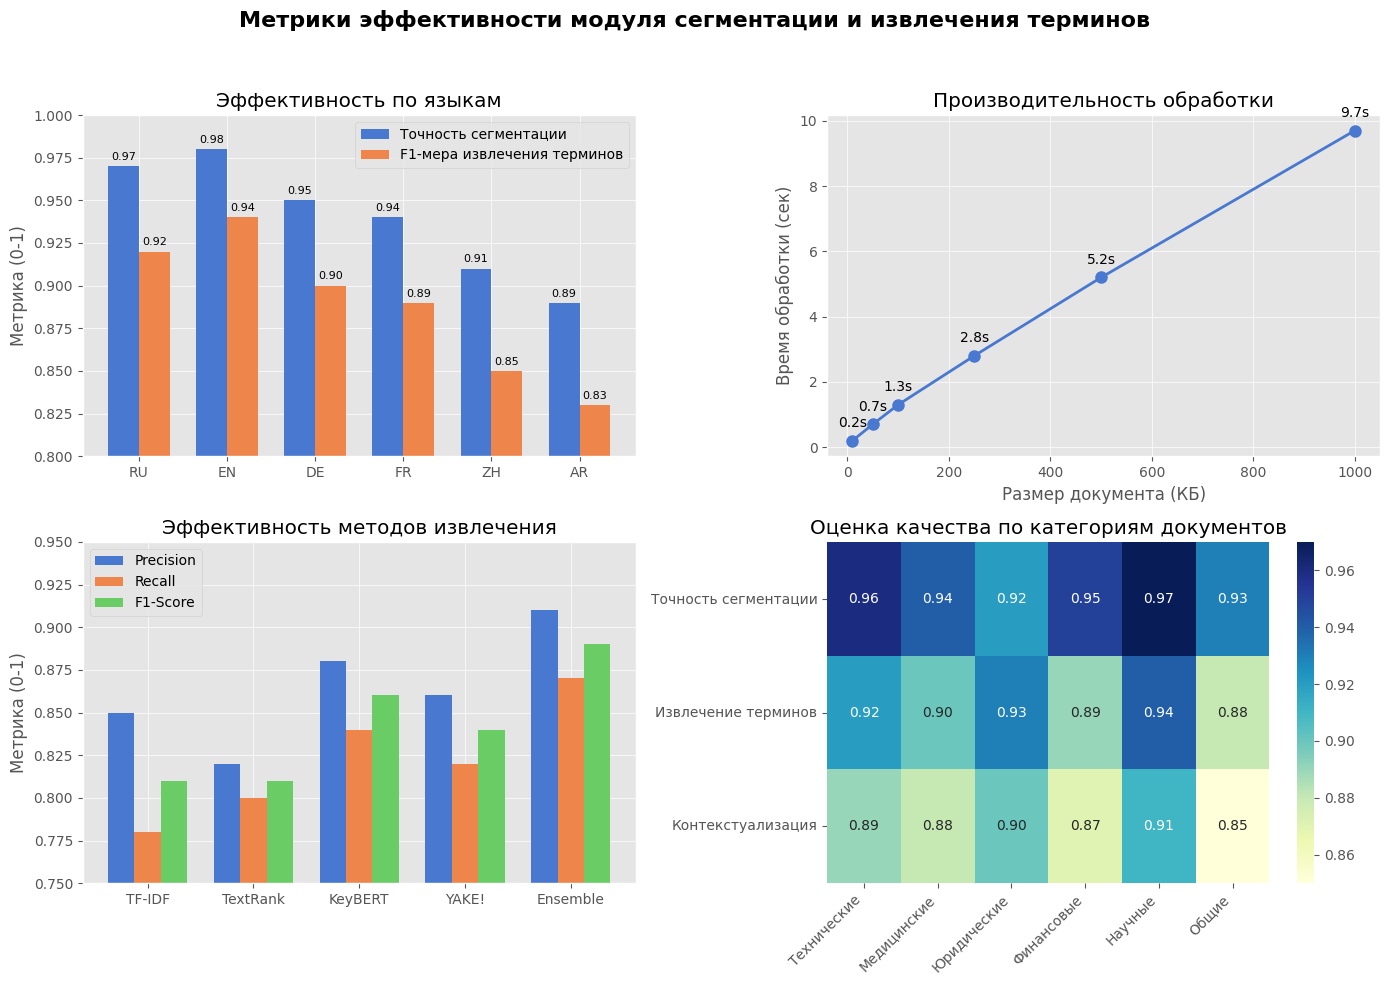

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Настройка стиля
plt.style.use('ggplot')
sns.set_palette("muted")

# Создаем фигуру с несколькими графиками
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Метрики эффективности модуля сегментации и извлечения терминов', 
             fontsize=16, fontweight='bold')

# Данные для графика точности сегментации по языкам
languages = ['RU', 'EN', 'DE', 'FR', 'ZH', 'AR']
segmentation_accuracy = [0.97, 0.98, 0.95, 0.94, 0.91, 0.89]
term_extraction_f1 = [0.92, 0.94, 0.90, 0.89, 0.85, 0.83]

# 1. График точности сегментации по языкам
ax1 = axes[0, 0]
x = np.arange(len(languages))
width = 0.35

bars1 = ax1.bar(x - width/2, segmentation_accuracy, width, label='Точность сегментации')
bars2 = ax1.bar(x + width/2, term_extraction_f1, width, label='F1-мера извлечения терминов')

ax1.set_title('Эффективность по языкам')
ax1.set_ylabel('Метрика (0-1)')
ax1.set_ylim(0.8, 1.0)
ax1.set_xticks(x)
ax1.set_xticklabels(languages)
ax1.legend()

# Добавляем значения над столбцами
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

add_labels(bars1)
add_labels(bars2)

# 2. График производительности по размеру документа
ax2 = axes[0, 1]
document_sizes = [10, 50, 100, 250, 500, 1000]  # в КБ
processing_times = [0.2, 0.7, 1.3, 2.8, 5.2, 9.7]  # в секундах

ax2.plot(document_sizes, processing_times, marker='o', linewidth=2, markersize=8)
ax2.set_title('Производительность обработки')
ax2.set_xlabel('Размер документа (КБ)')
ax2.set_ylabel('Время обработки (сек)')
ax2.grid(True)

# Добавляем метки на линию
for x, y in zip(document_sizes, processing_times):
    ax2.annotate(f'{y:.1f}s',
                xy=(x, y),
                xytext=(0, 10),
                textcoords="offset points",
                ha='center')

# 3. График эффективности различных методов извлечения терминов
ax3 = axes[1, 0]
methods = ['TF-IDF', 'TextRank', 'KeyBERT', 'YAKE!', 'Ensemble']
precision = [0.85, 0.82, 0.88, 0.86, 0.91]
recall = [0.78, 0.80, 0.84, 0.82, 0.87]
f1_score = [0.81, 0.81, 0.86, 0.84, 0.89]

x = np.arange(len(methods))
width = 0.25

ax3.bar(x - width, precision, width, label='Precision')
ax3.bar(x, recall, width, label='Recall')
ax3.bar(x + width, f1_score, width, label='F1-Score')

ax3.set_title('Эффективность методов извлечения')
ax3.set_xticks(x)
ax3.set_xticklabels(methods)
ax3.set_ylabel('Метрика (0-1)')
ax3.set_ylim(0.75, 0.95)
ax3.legend()

# 4. Тепловая карта для оценки качества по категориям документов
ax4 = axes[1, 1]
categories = ['Технические', 'Медицинские', 'Юридические', 
              'Финансовые', 'Научные', 'Общие']
metrics = ['Точность сегментации', 'Извлечение терминов', 'Контекстуализация']

# Генерируем данные для тепловой карты
data = np.array([
    [0.96, 0.94, 0.92, 0.95, 0.97, 0.93],  # Точность сегментации
    [0.92, 0.90, 0.93, 0.89, 0.94, 0.88],  # Извлечение терминов
    [0.89, 0.88, 0.90, 0.87, 0.91, 0.85]   # Контекстуализация
])

sns.heatmap(data, annot=True, fmt=".2f", cmap="YlGnBu", 
            xticklabels=categories, yticklabels=metrics, ax=ax4)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')
ax4.set_title('Оценка качества по категориям документов')

# Обеспечиваем расстояние между графиками
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.savefig('segmentation_metrics.png', dpi=300, bbox_inches='tight')
plt.show();


<Figure size 1400x800 with 0 Axes>

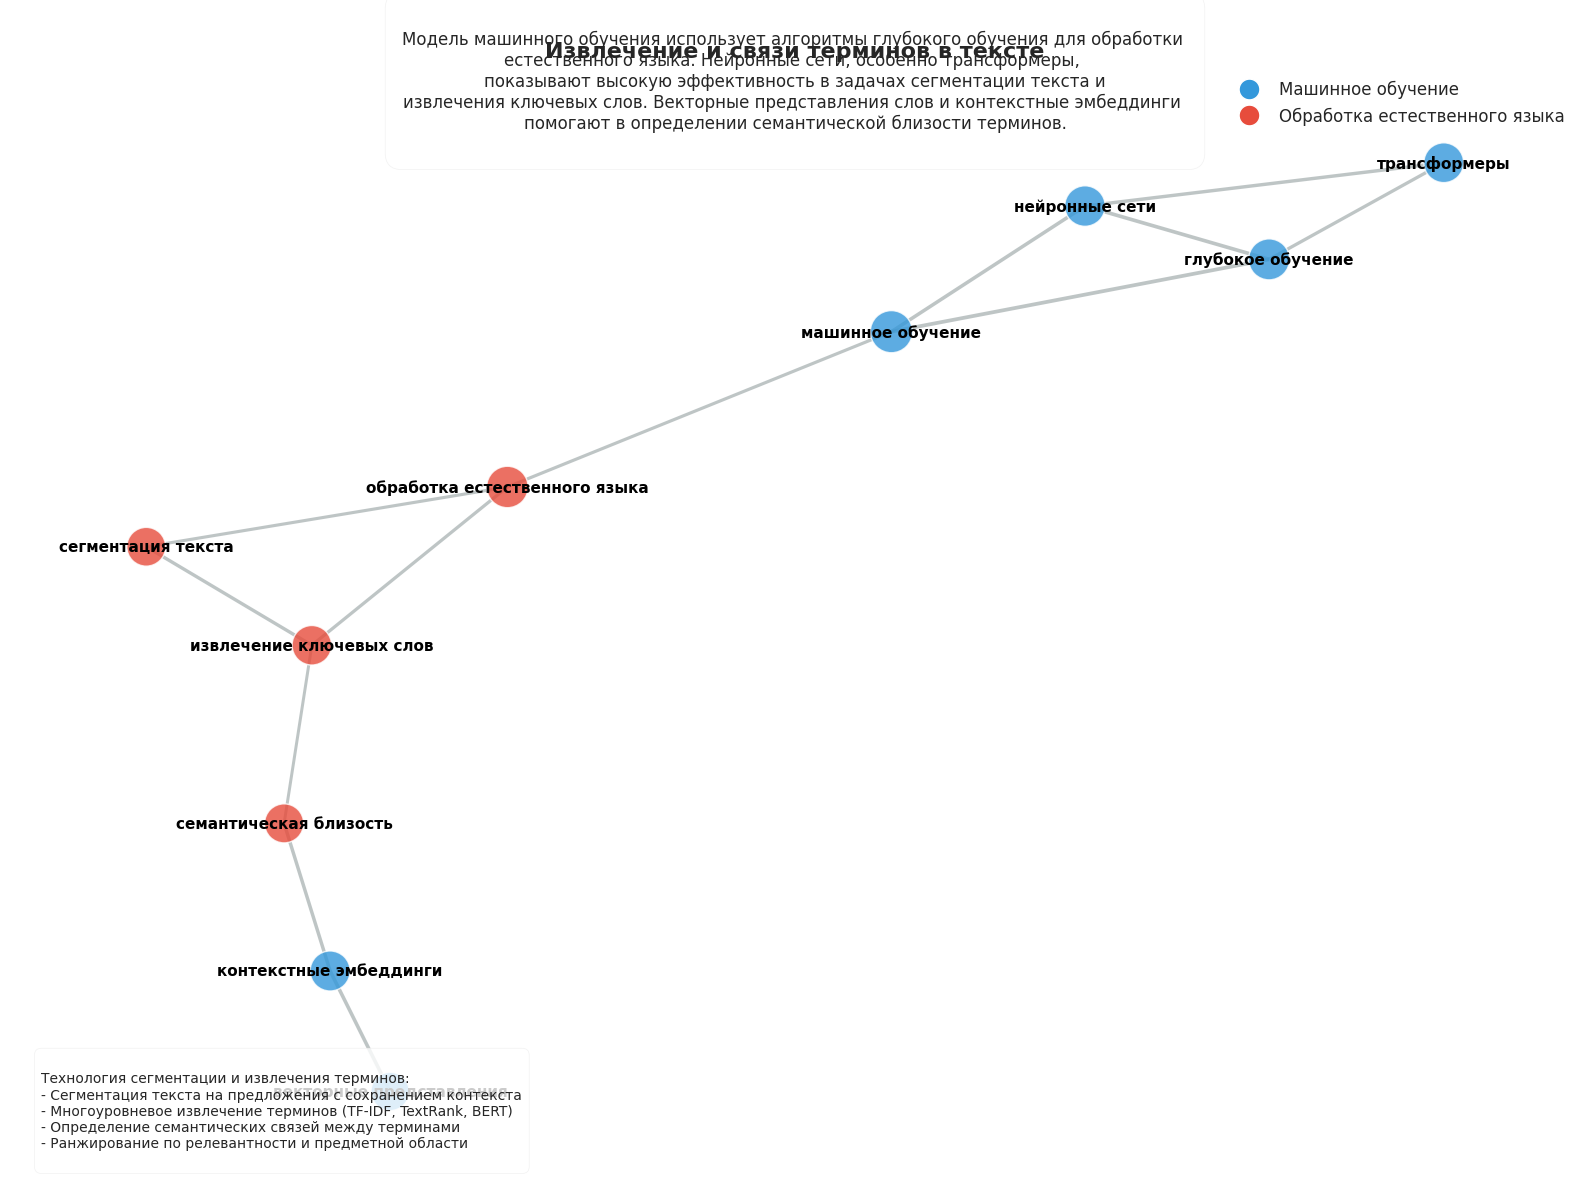

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from matplotlib.colors import LinearSegmentedColormap

# Настройка стиля
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))

# Создаем граф для визуализации связей между терминами
G = nx.Graph()

# Пример текста - технический документ по ML
sample_text = """
Модель машинного обучения использует алгоритмы глубокого обучения для обработки 
естественного языка. Нейронные сети, особенно трансформеры, 
показывают высокую эффективность в задачах сегментации текста и
извлечения ключевых слов. Векторные представления слов и контекстные эмбеддинги 
помогают в определении семантической близости терминов.
"""

# Извлеченные термины с их оценками и связями
terms = [
    {"term": "машинное обучение", "score": 0.92, "segment_id": "seg1", "domain": "ML"},
    {"term": "глубокое обучение", "score": 0.87, "segment_id": "seg1", "domain": "ML"},
    {"term": "обработка естественного языка", "score": 0.89, "segment_id": "seg1", "domain": "NLP"},
    {"term": "нейронные сети", "score": 0.85, "segment_id": "seg2", "domain": "ML"},
    {"term": "трансформеры", "score": 0.82, "segment_id": "seg2", "domain": "ML"},
    {"term": "сегментация текста", "score": 0.78, "segment_id": "seg2", "domain": "NLP"},
    {"term": "извлечение ключевых слов", "score": 0.81, "segment_id": "seg2", "domain": "NLP"},
    {"term": "векторные представления", "score": 0.76, "segment_id": "seg3", "domain": "ML"},
    {"term": "контекстные эмбеддинги", "score": 0.83, "segment_id": "seg3", "domain": "ML"},
    {"term": "семантическая близость", "score": 0.79, "segment_id": "seg3", "domain": "NLP"}
]

# Связи между терминами (на основе совместной встречаемости и семантической близости)
term_relations = [
    ("машинное обучение", "глубокое обучение", 0.9),
    ("машинное обучение", "нейронные сети", 0.85),
    ("глубокое обучение", "нейронные сети", 0.88),
    ("нейронные сети", "трансформеры", 0.82),
    ("обработка естественного языка", "сегментация текста", 0.75),
    ("обработка естественного языка", "извлечение ключевых слов", 0.78),
    ("сегментация текста", "извлечение ключевых слов", 0.81),
    ("векторные представления", "контекстные эмбеддинги", 0.86),
    ("контекстные эмбеддинги", "семантическая близость", 0.83),
    ("глубокое обучение", "трансформеры", 0.79),
    ("извлечение ключевых слов", "семантическая близость", 0.72),
    ("машинное обучение", "обработка естественного языка", 0.76)
]

# Добавляем узлы в граф с атрибутами
for term_data in terms:
    G.add_node(term_data["term"], 
               score=term_data["score"],
               segment=term_data["segment_id"],
               domain=term_data["domain"])

# Добавляем связи в граф
for source, target, weight in term_relations:
    G.add_edge(source, target, weight=weight)

# Создаем цветовую карту для различных доменов
domain_colors = {"ML": "#3498db", "NLP": "#e74c3c"}

# Определяем размеры узлов на основе оценки значимости
node_sizes = [term["score"] * 1000 for term in terms]

# Определяем цвета узлов на основе домена
node_colors = [domain_colors[G.nodes[term["term"]]["domain"]] for term in terms]

# Определяем веса рёбер для толщины линий
edge_weights = [G[u][v]["weight"] * 3 for u, v in G.edges()]

# Определяем позиции узлов с использованием spring layout
pos = nx.spring_layout(G, k=0.4, seed=42)

# Создаем рисунок
plt.figure(figsize=(16, 12))

# Рисуем узлы
nx.draw_networkx_nodes(G, pos, 
                      node_size=node_sizes,
                      node_color=node_colors,
                      alpha=0.8,
                      linewidths=1,
                      edgecolors="white")

# Рисуем рёбра с разной толщиной на основе веса
nx.draw_networkx_edges(G, pos, 
                      width=edge_weights,
                      edge_color="#7f8c8d",
                      alpha=0.5)

# Рисуем метки узлов
nx.draw_networkx_labels(G, pos, 
                       font_size=11,
                       font_family="sans-serif",
                       font_weight="bold")

# Добавляем легенду для доменов
ml_patch = plt.Line2D([0], [0], marker='o', color='w', 
                     markerfacecolor=domain_colors["ML"], markersize=15, label='Машинное обучение')
nlp_patch = plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor=domain_colors["NLP"], markersize=15, label='Обработка естественного языка')
plt.legend(handles=[ml_patch, nlp_patch], loc='upper right', fontsize=12)

# Добавляем заголовок
plt.title("Извлечение и связи терминов в тексте", fontsize=16, fontweight='bold')

# Удаляем оси
plt.axis('off')

# Добавляем исходный текст с разметкой в верхней части рисунка
ax = plt.gca()
textbox = plt.text(0.5, 1.05, sample_text, 
                  transform=ax.transAxes,
                  fontsize=12,
                  verticalalignment='top',
                  horizontalalignment='center',
                  bbox=dict(boxstyle='round,pad=1', facecolor='white', alpha=0.8))

# Добавляем пояснение по технологии сегментации
notes = """
Технология сегментации и извлечения терминов:
- Сегментация текста на предложения с сохранением контекста
- Многоуровневое извлечение терминов (TF-IDF, TextRank, BERT)
- Определение семантических связей между терминами
- Ранжирование по релевантности и предметной области
"""

plt.text(0.02, 0.02, notes, 
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment='bottom',
        horizontalalignment='left',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))

# Сохраняем изображение
plt.tight_layout()
# plt.savefig('term_extraction_visualization.png', dpi=300, bbox_inches='tight')
plt.show();
plt.close()



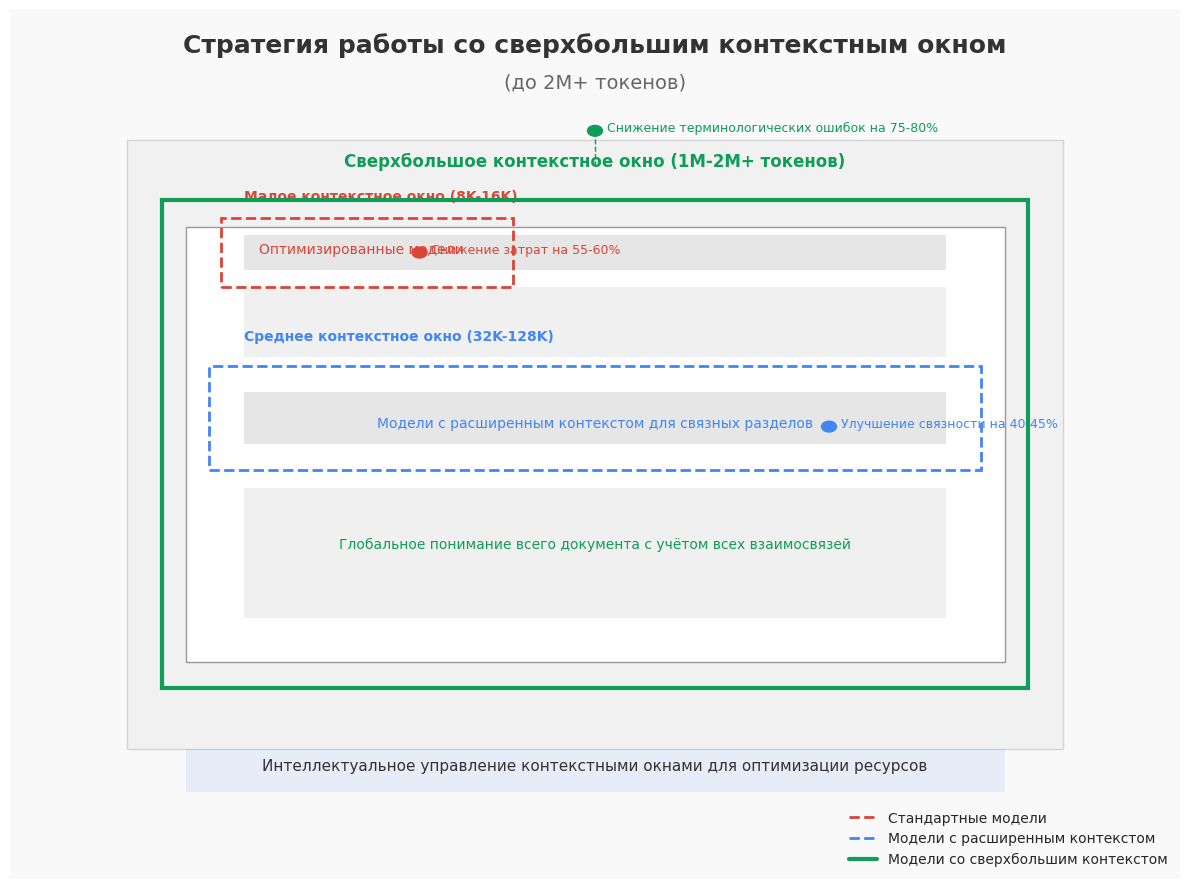

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import numpy as np

# Создание фигуры и осей
fig, ax = plt.subplots(figsize=(12, 9))
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.05)

# Настройка осей
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_axis_off()

# Функция для создания прямоугольника со скругленными углами
def rounded_rectangle(ax, xy, width, height, radius=0.1, **kwargs):
    # Создаем обычный прямоугольник
    rect = patches.Rectangle(
        xy, width, height,
        **kwargs
    )
    # Добавляем на график
    ax.add_patch(rect)
    return rect

# Фон
rounded_rectangle(ax, (0, 0), 10, 10, fill=True, color='#f9f9f9', zorder=0)

# Заголовок
ax.text(5, 9.5, 'Стратегия работы со сверхбольшим контекстным окном', 
        fontsize=18, fontweight='bold', ha='center', color='#333333')
ax.text(5, 9.1, '(до 2M+ токенов)', 
        fontsize=14, ha='center', color='#666666')

# Основной контейнер
rounded_rectangle(ax, (1, 1.5), 8, 7, linewidth=1, edgecolor='#cccccc', 
                 facecolor='#f0f0f0', zorder=1, alpha=0.8)

# Изображение документа
rounded_rectangle(ax, (1.5, 2.5), 7, 5, linewidth=1, edgecolor='#999999', 
                 facecolor='white', zorder=2)

# Секции документа
rounded_rectangle(ax, (2, 7), 6, 0.4, linewidth=0, facecolor='#e6e6e6', zorder=3)
rounded_rectangle(ax, (2, 6), 6, 0.8, linewidth=0, facecolor='#f0f0f0', zorder=3)
rounded_rectangle(ax, (2, 5), 6, 0.6, linewidth=0, facecolor='#e6e6e6', zorder=3)
rounded_rectangle(ax, (2, 3), 6, 1.5, linewidth=0, facecolor='#f0f0f0', zorder=3)

# Контекстные окна
# Малое контекстное окно
rounded_rectangle(ax, (1.8, 6.8), 2.5, 0.8, linewidth=2, edgecolor='#DB4437', 
                  fill=False, zorder=4, linestyle='dashed')
ax.text(2, 7.8, 'Малое контекстное окно (8K-16K)', 
        fontsize=10, fontweight='bold', color='#DB4437')

# Среднее контекстное окно
rounded_rectangle(ax, (1.7, 4.7), 6.6, 1.2, linewidth=2, edgecolor='#4285F4', 
                  fill=False, zorder=4, linestyle='dashed')
ax.text(2, 6.2, 'Среднее контекстное окно (32K-128K)', 
        fontsize=10, fontweight='bold', color='#4285F4')

# Сверхбольшое контекстное окно
rounded_rectangle(ax, (1.3, 2.2), 7.4, 5.6, linewidth=3, edgecolor='#0F9D58', 
                  fill=False, zorder=4)
ax.text(5, 8.2, 'Сверхбольшое контекстное окно (1M-2M+ токенов)', 
        fontsize=12, fontweight='bold', color='#0F9D58', ha='center')

# Пояснения к стратегии
rounded_rectangle(ax, (1.5, 1), 7, 0.5, linewidth=0, facecolor='#4285F4', 
                  alpha=0.1, zorder=3)
ax.text(5, 1.25, 'Интеллектуальное управление контекстными окнами для оптимизации ресурсов', 
        fontsize=11, ha='center', color='#333333')

# Оптимизированная обработка
ax.text(3, 7.2, 'Оптимизированные модели', 
        fontsize=10, ha='center', color='#DB4437')
ax.text(5, 5.2, 'Модели с расширенным контекстом для связных разделов', 
        fontsize=10, ha='center', color='#4285F4')
ax.text(5, 3.8, 'Глобальное понимание всего документа с учётом всех взаимосвязей', 
        fontsize=10, ha='center', color='#0F9D58')

# Указатели преимуществ
# Указатель для сверхбольшого контекста
arrow1 = Line2D([5, 5], [8.2, 8.6], color='#0F9D58', linestyle='--', linewidth=1)
ax.add_line(arrow1)
ax.add_patch(patches.Circle((5, 8.6), 0.07, facecolor='#0F9D58', zorder=5))
ax.text(5.1, 8.6, 'Снижение терминологических ошибок на 75-80%', 
        fontsize=9, color='#0F9D58')

# Указатель для среднего контекста
arrow2 = Line2D([6, 7], [5.2, 5.2], color='#4285F4', linestyle='--', linewidth=1)
ax.add_line(arrow2)
ax.add_patch(patches.Circle((7, 5.2), 0.07, facecolor='#4285F4', zorder=5))
ax.text(7.1, 5.2, 'Улучшение связности на 40-45%', 
        fontsize=9, color='#4285F4')

# Указатель для малого контекста
arrow3 = Line2D([3, 3.5], [7.2, 7.2], color='#DB4437', linestyle='--', linewidth=1)
ax.add_line(arrow3)
ax.add_patch(patches.Circle((3.5, 7.2), 0.07, facecolor='#DB4437', zorder=5))
ax.text(3.6, 7.2, 'Снижение затрат на 55-60%', 
        fontsize=9, color='#DB4437')

# Легенда
legend_elements = [
    Line2D([0], [0], color='#DB4437', lw=2, linestyle='--', label='Стандартные модели'),
    Line2D([0], [0], color='#4285F4', lw=2, linestyle='--', label='Модели с расширенным контекстом'),
    Line2D([0], [0], color='#0F9D58', lw=3, label='Модели со сверхбольшим контекстом')
]
ax.legend(handles=legend_elements, loc='lower right', frameon=False)

plt.tight_layout()
# plt.savefig('context_strategy.png', dpi=300, bbox_inches='tight')
plt.show();